# Part A: Data preparation (Data Cleaning and Data Preprocessing)
## Step 1: Import original / source dataset.

In [1]:
import pandas as pd
import math
df = pd.read_csv("../Machine_Learning\Dataset\wet-bulb-temperature-hourly.csv",header='infer')
df

,wbt_date,wbt_time,wet_bulb_temperature
0,1982-01-01,1,24.7
1,1982-01-01,2,24.5
2,1982-01-01,3,24.3
3,1982-01-01,4,24.2
4,1982-01-01,5,24.2
...,...,...,...
351379,2022-01-31,20,24.5
351380,2022-01-31,21,24.5
351381,2022-01-31,22,24.4
351382,2022-01-31,23,24.5


## Step 2: Remove unessary data set. Only requires last 5 years / 60 Months dataset.

As the original dataset is using hourly dataset, we will need to calculate how many hourly dataset is required of X months using the formula: 

number of dataset required = months * weeks * days * hours

In [2]:
months = 60
no_of_dataset_required = months * 4 * 7 *24
print('Number of dataset required = %d' % (no_of_dataset_required))
df_trimmed = df.tail(no_of_dataset_required)
df_trimmed

Number of dataset required = 40320


,wbt_date,wbt_time,wet_bulb_temperature
311064,2017-06-27,1,25.6
311065,2017-06-27,2,25.6
311066,2017-06-27,3,25.9
311067,2017-06-27,4,26.0
311068,2017-06-27,5,22.7
...,...,...,...
351379,2022-01-31,20,24.5
351380,2022-01-31,21,24.5
351381,2022-01-31,22,24.4
351382,2022-01-31,23,24.5


## Step 3: Check for any duplicate data in original dataset

In [3]:
print('Number of rows before discarding duplicates = %d' % (df.shape[0]))
df_remove_dup = df_trimmed.drop_duplicates()
print('Number of rows after discarding duplicates = %d' % (df_remove_dup.shape[0]))

Number of rows before discarding duplicates = 351384
Number of rows after discarding duplicates = 40320


## Step 4: Check for missing data <br>
i)Identify if attributes have missing data

ii)count the number of missing values in each of these attributes

In [4]:
import numpy as np

df_check_null = df_remove_dup.replace('?',np.NaN)

print('Number of instances = %d' % (df_check_null.shape[0]))
print('Number of attributes = %d' % (df_check_null.shape[1]))

print('Number of missing values:')
for col in df_check_null.columns:
    print('\t%s: %d' % (col,df_check_null[col].isna().sum()))

Number of instances = 40320
Number of attributes = 3
Number of missing values:
	wbt_date: 0
	wbt_time: 0
	wet_bulb_temperature: 0


## Step 5: Drop missing data if any exists

In [5]:
print('Number of rows in original data = %d' % (df_check_null.shape[0]))
df_drop_null = df_check_null.dropna()
print('Number of rows after discarding missing values = %d' % (df_drop_null.shape[0]))

Number of rows in original data = 40320
Number of rows after discarding missing values = 40320


## Step 6: Create visual representation / chart for trimmed dataset.

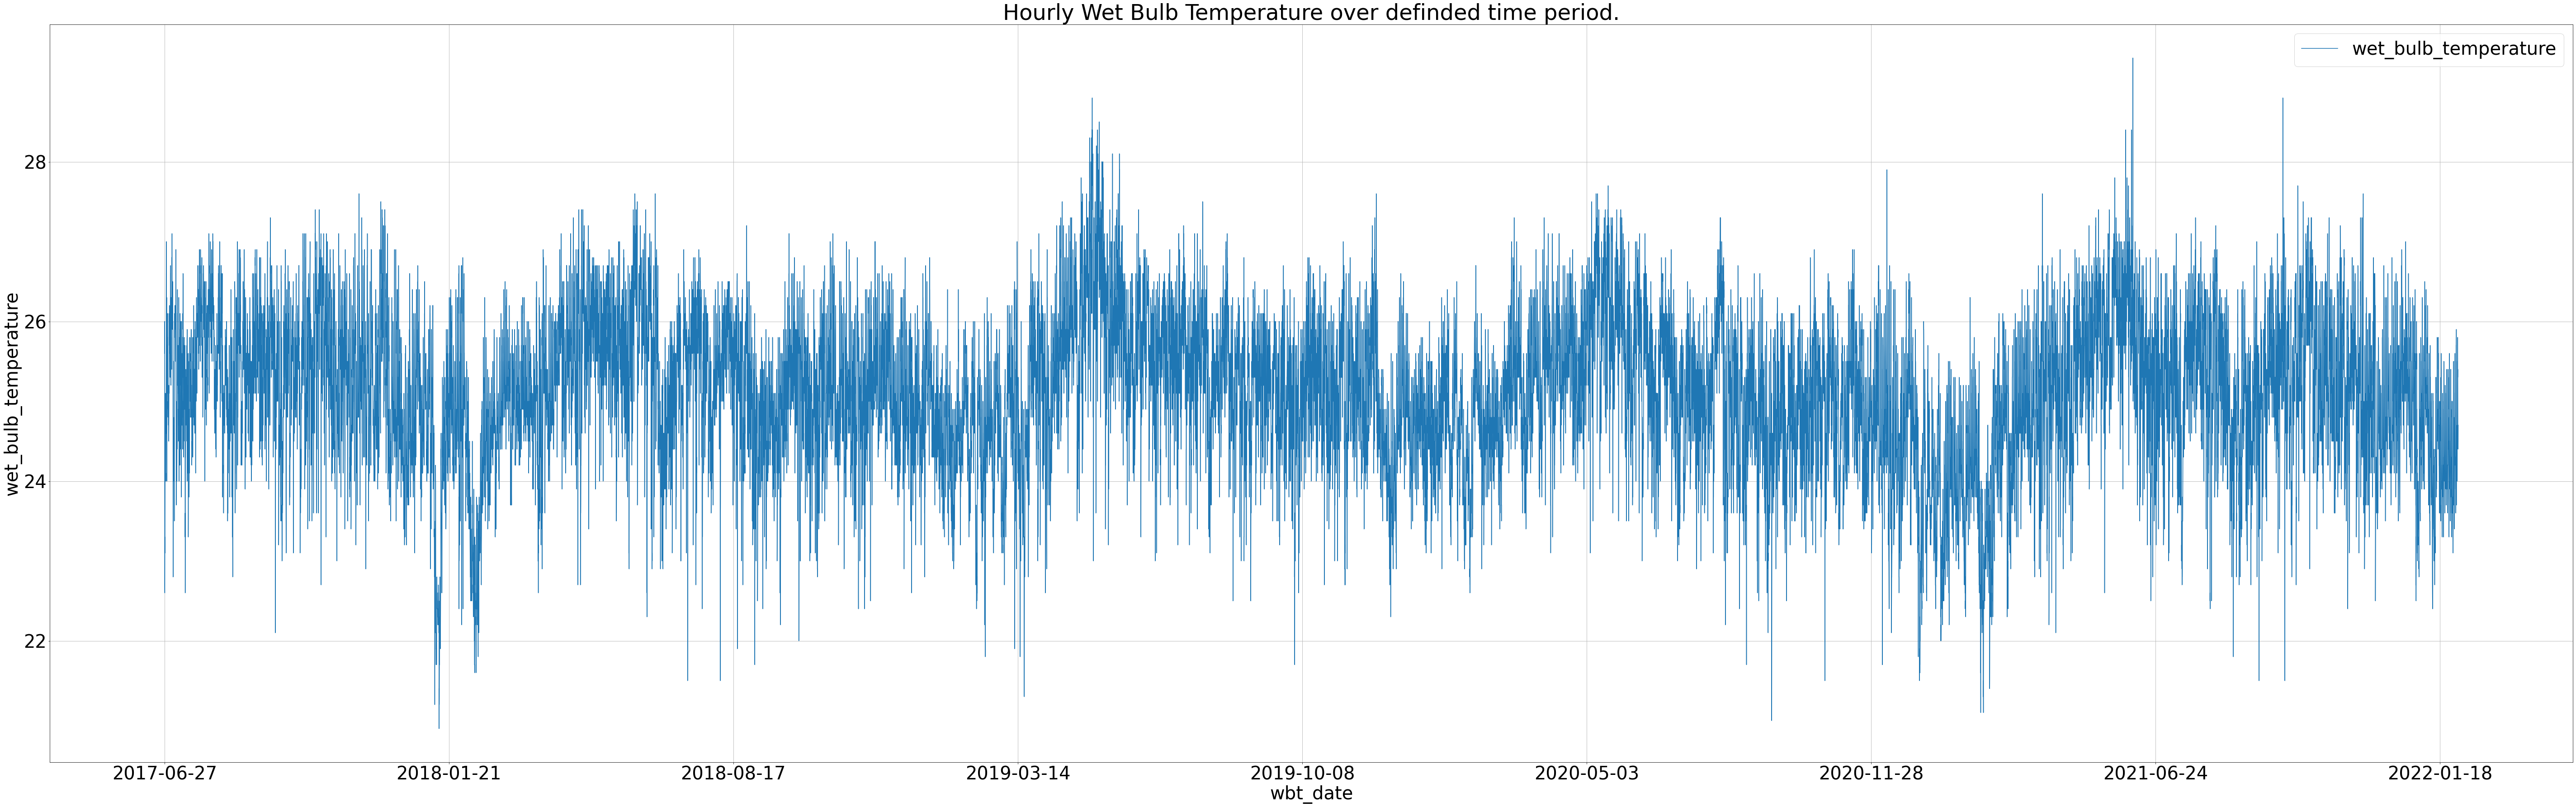

In [6]:
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 40})
df_drop_null.plot(x ='wbt_date', y='wet_bulb_temperature', kind = 'line', title='Hourly Wet Bulb Temperature over definded time period.', figsize =(100,30), grid =True)
plt.ylabel('wet_bulb_temperature')	
plt.xlabel('wbt_date')
plt.show()

## Step 7: Create labels for WBGT readings according to SAF Work Rest Cycle Guidelines


<img src="SAFWorkRestCycle.png" width=1080 height=400>


In [7]:
df_clean_data = df_drop_null.copy()
df_original_threshold = df_clean_data.copy() #Clean data before data processing

wbt_high_risk_black = 33.0
wbt_high_risk_red = 32.0
wbt_medium_risk_yellow = 31.0
wbt_low_risk_green = 30.0
wbt_low_risk_white =  29.9
risk_level = []

for row in df_original_threshold.index:
    if(df_original_threshold['wet_bulb_temperature'][row]>=wbt_high_risk_black):
        risk_level.append('high_black')
    elif((df_original_threshold['wet_bulb_temperature'][row]>=wbt_high_risk_red) & (df_original_threshold['wet_bulb_temperature'][row]<wbt_high_risk_black)):
        risk_level.append('high_red')
    elif((df_original_threshold['wet_bulb_temperature'][row]>=wbt_medium_risk_yellow) & (df_original_threshold['wet_bulb_temperature'][row]<wbt_high_risk_red)):
        risk_level.append('medium_yellow')
    elif((df_original_threshold['wet_bulb_temperature'][row]>=wbt_low_risk_green) & (df_original_threshold['wet_bulb_temperature'][row]<wbt_medium_risk_yellow)):
        risk_level.append('low_green')
    elif((df_original_threshold['wet_bulb_temperature'][row]<=wbt_low_risk_white)):
        risk_level.append('low_white')

df_original_threshold['risk_level'] = risk_level
df_original_threshold


,wbt_date,wbt_time,wet_bulb_temperature,risk_level
311064,2017-06-27,1,25.6,low_white
311065,2017-06-27,2,25.6,low_white
311066,2017-06-27,3,25.9,low_white
311067,2017-06-27,4,26.0,low_white
311068,2017-06-27,5,22.7,low_white
...,...,...,...,...
351379,2022-01-31,20,24.5,low_white
351380,2022-01-31,21,24.5,low_white
351381,2022-01-31,22,24.4,low_white
351382,2022-01-31,23,24.5,low_white


## Step 7.a: Show count of each risk level

In [8]:
risk_high_black = df_original_threshold.apply(lambda x: True if x['risk_level'] == 'high_black' else False , axis=1)
risk_high_red = df_original_threshold.apply(lambda x: True if x['risk_level'] == 'high_red' else False , axis=1)
risk_medium_yellow = df_original_threshold.apply(lambda x: True if x['risk_level'] == 'medium_yellow' else False , axis=1)
risk_low_green = df_original_threshold.apply(lambda x: True if x['risk_level'] == 'low_green' else False , axis=1)
risk_low_white = df_original_threshold.apply(lambda x: True if x['risk_level'] == 'low_white' else False , axis=1)


number_of_high_black = len(risk_high_black[risk_high_black==True].index)
number_of_high_red = len(risk_high_red[risk_high_red==True].index)
number_of_medium_yellow = len(risk_medium_yellow[risk_medium_yellow==True].index)
number_of_low_green = len(risk_low_green[risk_low_green==True].index)
number_of_low_white = len(risk_low_white[risk_low_white==True].index)

total = number_of_high_black +number_of_high_red +number_of_medium_yellow+number_of_low_green+number_of_low_white

column = df["wet_bulb_temperature"]
highest_wbgt_reading = column. max()

print('Count of high risk (Black) = %d' % number_of_high_black)
print('Count of high risk (Red)= %d' % number_of_high_red)
print('Count of medium risk (Yellow)= %d' % number_of_medium_yellow)
print('Count of low risk (Green)= %d' % number_of_low_green)
print('Count of low risk (White)= %d' % number_of_low_white)

print('Total count of all risk (Original Threshold)= %d' % total)
print('Total count of clean data = %d' % df_original_threshold.shape[0])
print('Highest WBGT readings = %.2f' % highest_wbgt_reading)

Count of high risk (Black) = 0
Count of high risk (Red)= 0
Count of medium risk (Yellow)= 0
Count of low risk (Green)= 0
Count of low risk (White)= 40320
Total count of all risk (Original Threshold)= 40320
Total count of clean data = 40320
Highest WBGT readings = 29.30


# Step 8: Modify threshold limits

As the orginal dataset and SAF work rest cycle labels all of the data point as "Super Low Risk", no meaningful data / labels can be extrapolated.


Hence, lowering the threshold of "risk_high_black" according to the maximum WBGT datapoint and creating an interval of 1°C for risk_high_black, risk_high_red, risk_medium_yellow, risk_low_green, risk_low_white

I.E.

risk_high_black = 29.0 <br>
risk_high_red = 28.0 <br>
risk_medium_yellow = 27.0 <br>
risk_low_green = 26.0 <br>
risk_low_white = 25.9 <br>

<img src="SAFWorkRestCycle.png" width=1080 height=400>

In [9]:
df_modified_threshold = df_clean_data.copy() #Clean data before data processing

wbt_high_risk_black = 28.0
wbt_high_risk_red = 27.0
wbt_medium_risk_yellow = 26.0
wbt_low_risk_green = 25.0
wbt_low_risk_white =  24.9
risk_level = []

for row in df_modified_threshold.index:
    if(df_modified_threshold['wet_bulb_temperature'][row]>=wbt_high_risk_black):
        risk_level.append('high_black')
    elif((df_modified_threshold['wet_bulb_temperature'][row]>=wbt_high_risk_red) & (df_modified_threshold['wet_bulb_temperature'][row]<wbt_high_risk_black)):
        risk_level.append('high_red')
    elif((df_modified_threshold['wet_bulb_temperature'][row]>=wbt_medium_risk_yellow) & (df_modified_threshold['wet_bulb_temperature'][row]<wbt_high_risk_red)):
        risk_level.append('medium_yellow')
    elif((df_modified_threshold['wet_bulb_temperature'][row]>=wbt_low_risk_green) & (df_modified_threshold['wet_bulb_temperature'][row]<wbt_medium_risk_yellow)):
        risk_level.append('low_green')
    elif((df_modified_threshold['wet_bulb_temperature'][row]<=wbt_low_risk_white)):
        risk_level.append('low_white')
        

df_modified_threshold['risk_level'] = risk_level
df_modified_threshold
# df_excel = df_modified_threshold.drop(['wbt_date', 'wbt_time'], axis=1)
# df_excel.to_csv('modified_WBGT_hourly.csv', index=False)
# df_excel = df_modified_threshold.drop(['wbt_date', 'wbt_time','risk_level'], axis=1)
# df_excel.to_csv('only_WBGT_hourly.csv', index=False)

,wbt_date,wbt_time,wet_bulb_temperature,risk_level
311064,2017-06-27,1,25.6,low_green
311065,2017-06-27,2,25.6,low_green
311066,2017-06-27,3,25.9,low_green
311067,2017-06-27,4,26.0,medium_yellow
311068,2017-06-27,5,22.7,low_white
...,...,...,...,...
351379,2022-01-31,20,24.5,low_white
351380,2022-01-31,21,24.5,low_white
351381,2022-01-31,22,24.4,low_white
351382,2022-01-31,23,24.5,low_white


## Step 8.a: Show count of each risk level (Modified threshold)

In [10]:
risk_high_black = df_modified_threshold.apply(lambda x: True if x['risk_level'] == 'high_black' else False , axis=1)
risk_high_red = df_modified_threshold.apply(lambda x: True if x['risk_level'] == 'high_red' else False , axis=1)
risk_medium_yellow = df_modified_threshold.apply(lambda x: True if x['risk_level'] == 'medium_yellow' else False , axis=1)
risk_low_green = df_modified_threshold.apply(lambda x: True if x['risk_level'] == 'low_green' else False , axis=1)
risk_low_white = df_modified_threshold.apply(lambda x: True if x['risk_level'] == 'low_white' else False , axis=1)

number_of_high_black = len(risk_high_black[risk_high_black==True].index)
number_of_high_red = len(risk_high_red[risk_high_red==True].index)
number_of_medium_yellow = len(risk_medium_yellow[risk_medium_yellow==True].index)
number_of_low_green = len(risk_low_green[risk_low_green==True].index)
number_of_low_white = len(risk_low_white[risk_low_white==True].index)

total = number_of_high_black +number_of_high_red +number_of_medium_yellow+number_of_low_green+number_of_low_white

column = df["wet_bulb_temperature"]
highest_wbgt_reading = column. max()

print('Count of high risk (Black) = %d' % number_of_high_black)
print('Count of high risk (Red)= %d' % number_of_high_red)
print('Count of medium risk (Yellow)= %d' % number_of_medium_yellow)
print('Count of low risk (Green)= %d' % number_of_low_green)
print('Count of low risk (White)= %d' % number_of_low_white)

print('Total count of all risk (Modified Threshold)= %d' % total)
print('Total count of clean data = %d' % df_modified_threshold.shape[0])
print('Highest WBGT readings = %.2f' % highest_wbgt_reading)

Count of high risk (Black) = 33
Count of high risk (Red)= 454
Count of medium risk (Yellow)= 6266
Count of low risk (Green)= 16701
Count of low risk (White)= 16866
Total count of all risk (Modified Threshold)= 40320
Total count of clean data = 40320
Highest WBGT readings = 29.30


In [11]:
window_value = math.floor(df_modified_threshold.shape[0]/2)
rolmean = df_modified_threshold.rolling(window=window_value).mean()
rolstd = df_modified_threshold.rolling(window=window_value).std()

print(rolmean, rolstd)

        wbt_time  wet_bulb_temperature
311064       NaN                   NaN
311065       NaN                   NaN
311066       NaN                   NaN
311067       NaN                   NaN
311068       NaN                   NaN
...          ...                   ...
351379      12.5             24.984871
351380      12.5             24.984856
351381      12.5             24.984876
351382      12.5             24.984886
351383      12.5             24.984891

[40320 rows x 2 columns]         wbt_time  wet_bulb_temperature
311064       NaN                   NaN
311065       NaN                   NaN
311066       NaN                   NaN
311067       NaN                   NaN
311068       NaN                   NaN
...          ...                   ...
351379  6.922358              0.923498
351380  6.922358              0.923503
351381  6.922358              0.923486
351382  6.922358              0.923480
351383  6.922358              0.923478

[40320 rows x 2 columns]


In [12]:
df_timeseries = df_modified_threshold.copy()
#df_timeseries.insert(0, 'ID', range(1, 1 + len(df_timeseries)))

df_timeseries.drop(['wbt_date','wbt_time','risk_level'],axis=1, inplace=True)
df_timeseries.reset_index(drop=True,inplace=True)
df_timeseries.describe()

,wet_bulb_temperature
count,40320.000000
mean,25.087364
std,0.914927
min,20.900000
25%,24.500000
50%,25.100000
75%,25.700000
max,29.300000


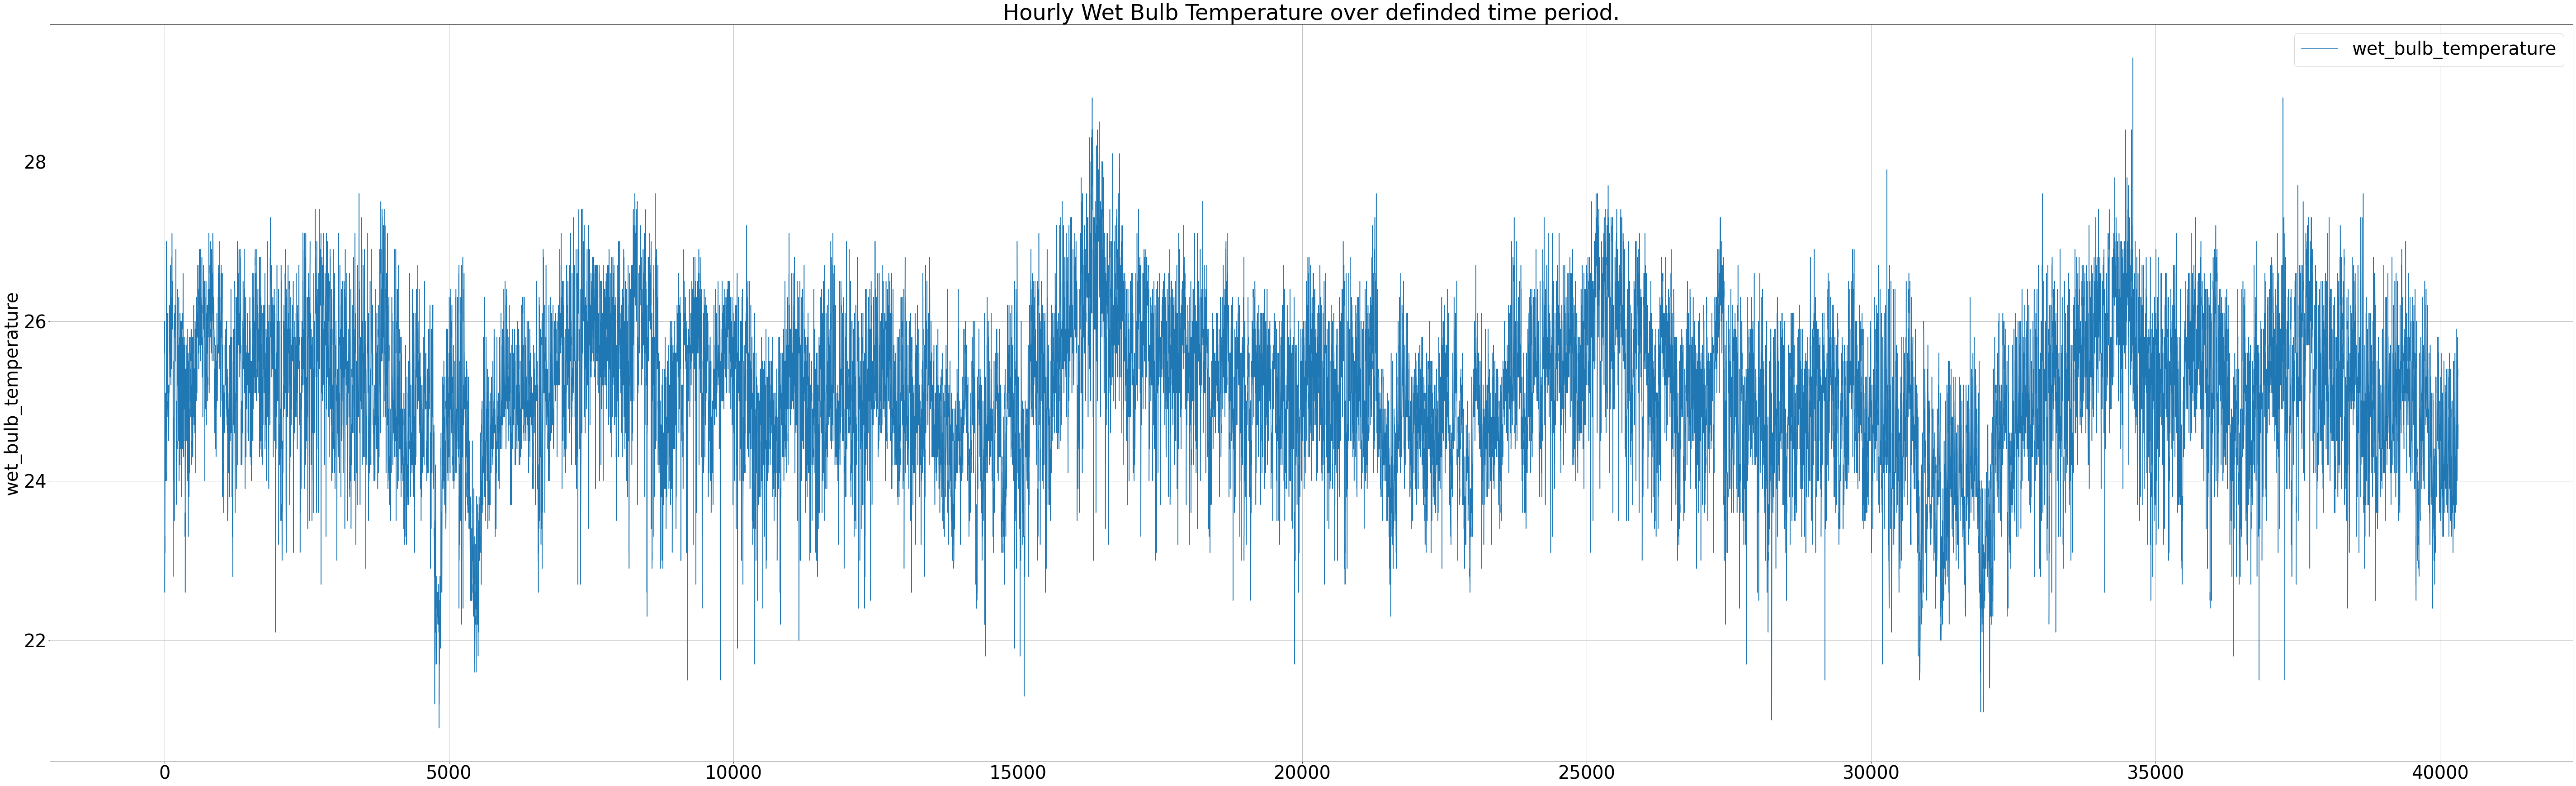

In [13]:
plt.rcParams.update({'font.size': 40})
df_timeseries.plot(y='wet_bulb_temperature', kind = 'line', title='Hourly Wet Bulb Temperature over definded time period.', figsize =(100,30), grid =True)
plt.ylabel('wet_bulb_temperature')	
plt.show()

<AxesSubplot:>

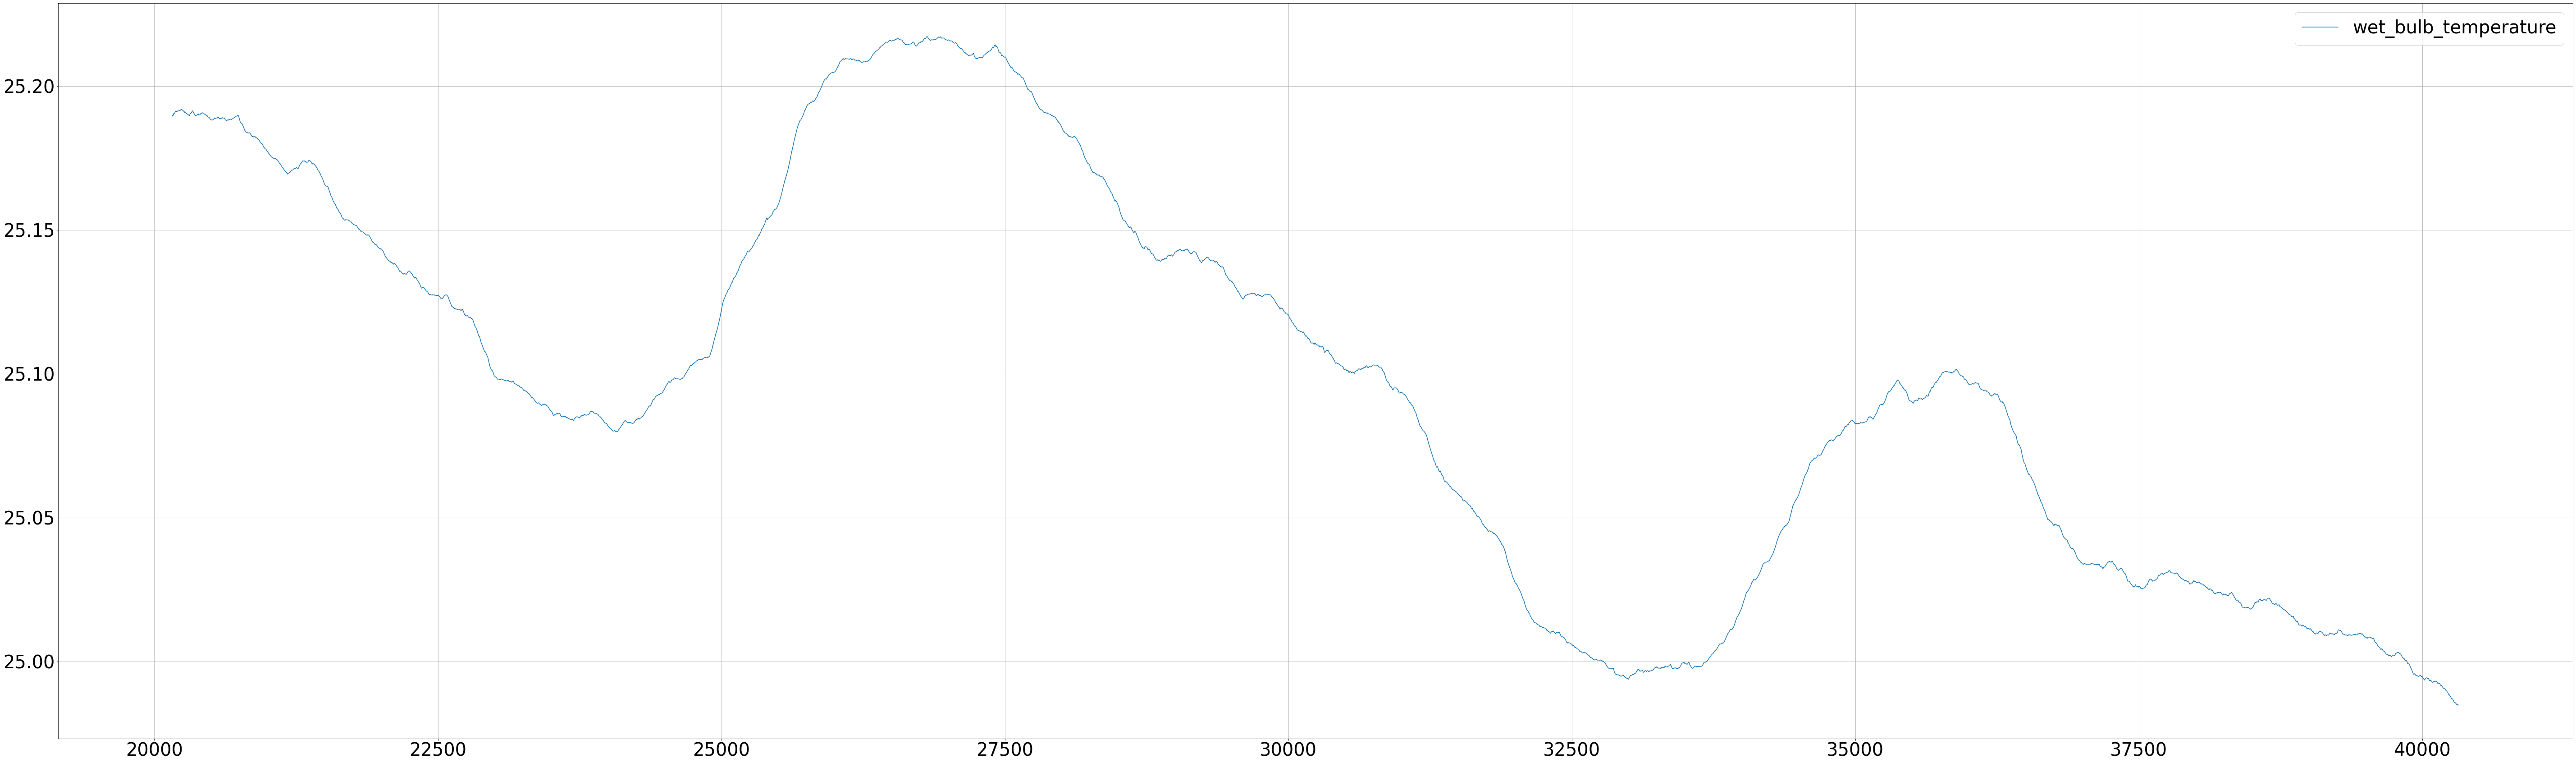

In [14]:
plt.rcParams.update({'font.size': 40})
#672 = 672 hours in one month
df_timeseries_mean = df_timeseries.rolling(window=window_value).mean()
df_timeseries_mean.plot( figsize =(100,30), grid =True)

<AxesSubplot:>

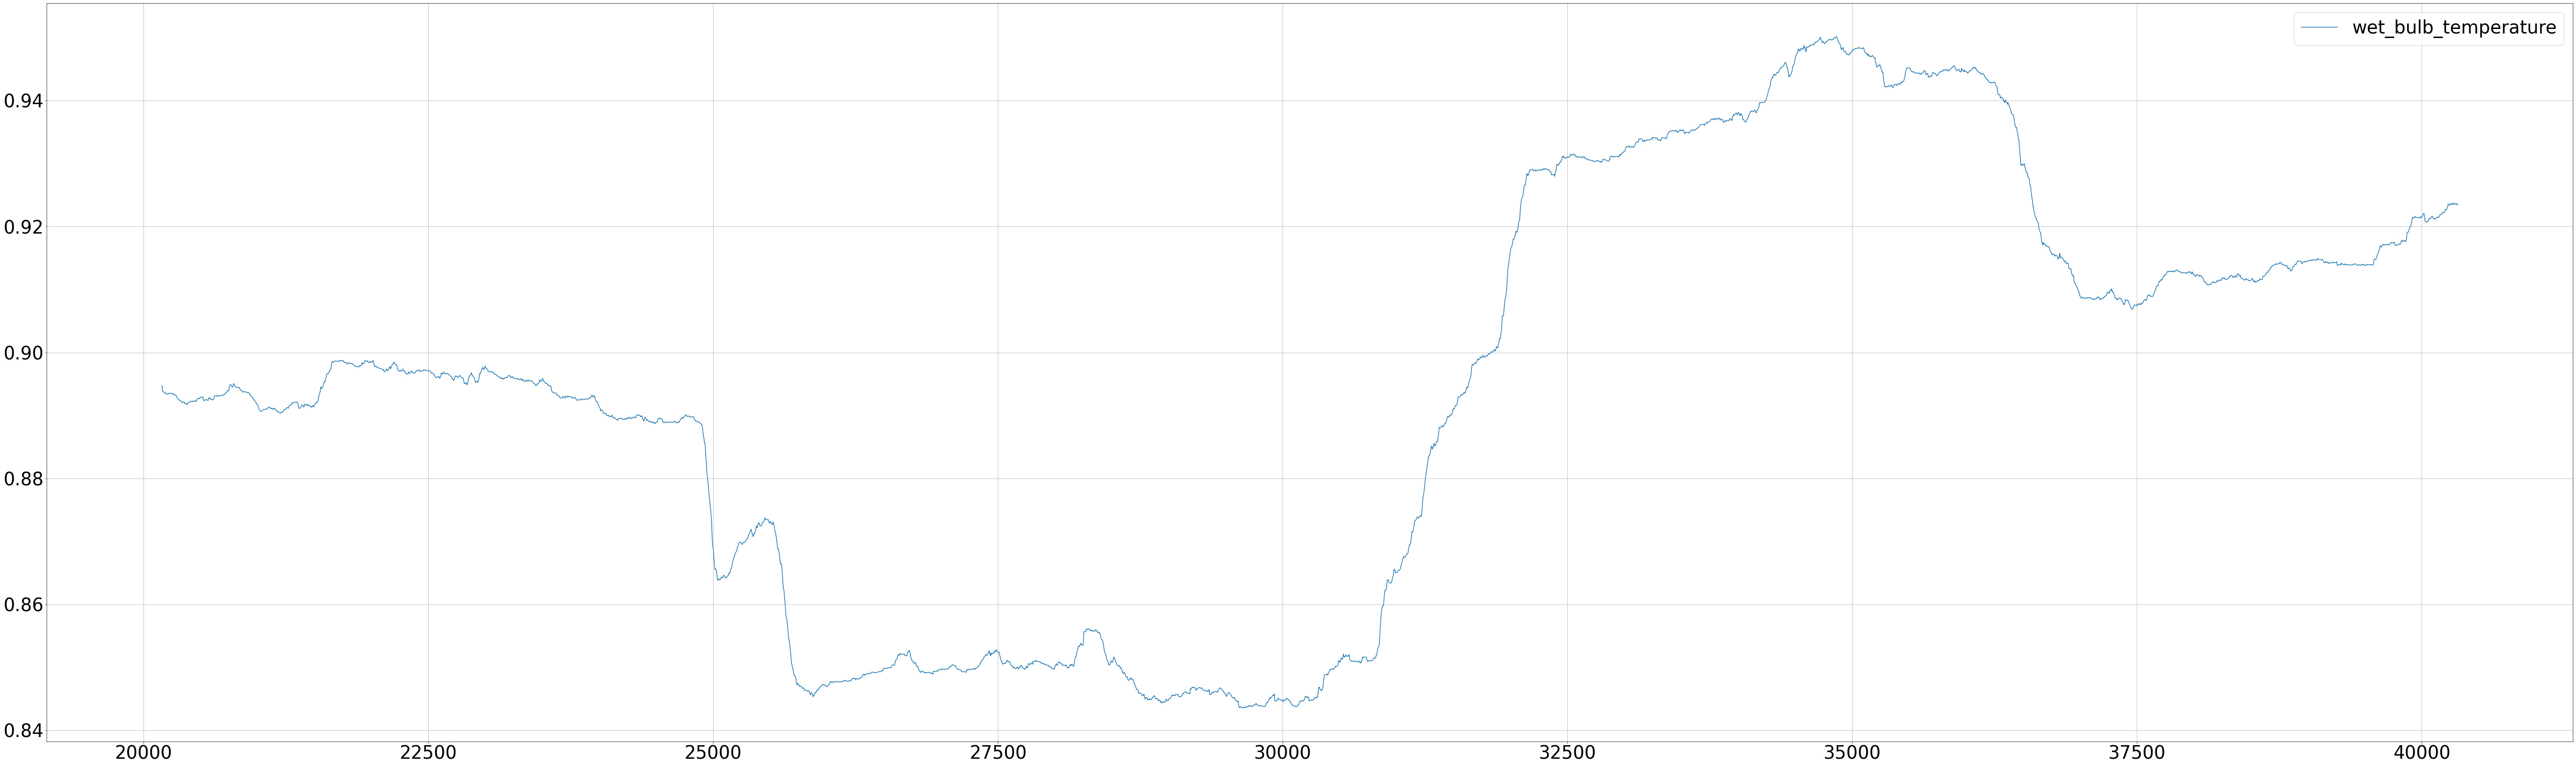

In [15]:
df_timeseries_std = df_timeseries.rolling(window=window_value).std()
df_timeseries_std.plot( figsize =(100,30), grid =True)

In [16]:
series_value = df_timeseries.values
value =pd.DataFrame(series_value)
df_wbgt = pd.concat([value,value.shift(window_value)],axis=1)
df_wbgt.columns=['Actual_WBGT', 'Forcast_WBGT']
df_wbgt.tail()

,Actual_WBGT,Forcast_WBGT
40315,24.5,25.5
40316,24.5,24.8
40317,24.4,24.0
40318,24.5,24.3
40319,24.7,24.6


In [17]:
from sklearn.metrics import mean_squared_error
import numpy as np

In [18]:
df_wbgt_test = df_wbgt[window_value:]
df_wbgt_error = mean_squared_error(df_wbgt_test.Actual_WBGT,df_wbgt_test.Forcast_WBGT)
df_wbgt_error


1.7404260912698415

In [19]:
np.sqrt(df_wbgt_error)

1.319252095419917

In [20]:
#ARIMA = Autoregressive (p) Integrated (d) Moving Average(q)
#ARIMA(p,d,q)
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

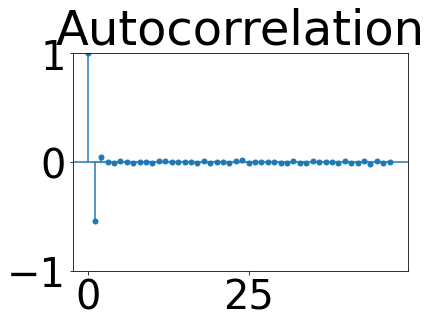

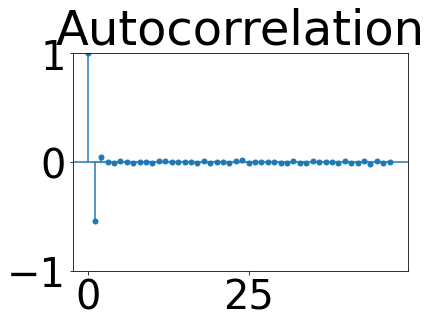

In [21]:
plot_acf(df_timeseries.wet_bulb_temperature.diff().diff().dropna())
#To identify the value of q, I.E. 4

c:\Users\Bernie\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


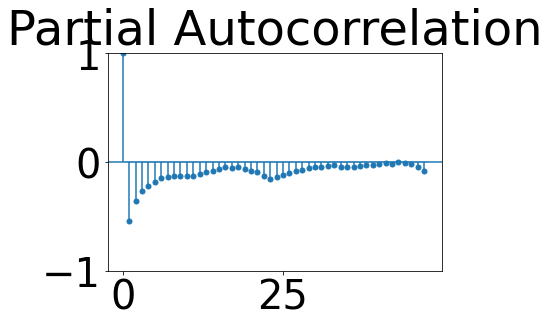

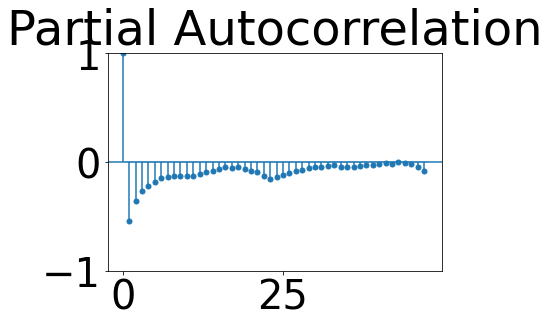

In [22]:
plot_pacf(df_timeseries.wet_bulb_temperature.diff().diff().dropna())
#To identify the value of p. I.E.4

In [50]:

train_size = math.floor(0.8*df_timeseries.size)
test_size =math.floor(df_timeseries.size)
train = df_timeseries.wet_bulb_temperature.diff().diff().dropna()[0:train_size]
test = df_timeseries.wet_bulb_temperature.diff().diff().dropna()[train_size:test_size]
print('train size = ',train_size,'test size = ', test_size)

train size =  32256 test size =  40320


In [51]:
import statsmodels.api as sm

In [ ]:
wbgt_model = sm.tsa.arima.ARIMA(train,order=(4,0,4))
# df_timeseries
#0,0,0 = 86206.67622286279
#1,0,1 = 38630.92548962805
#1,1,1 = 37831.779074705555
#4,0,4 = 37722.3964

# df_timeseries.wet_bulb_temperature.diff().diff().dropna()
# 4,0,4 = 

c:\Users\Bernie\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Bernie\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Bernie\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [53]:
wbgt_model_fit = wbgt_model.fit()

In [ ]:
wbgt_model_fit.aic
#Lower is better = model is more accurate

37722.39643929551

In [ ]:
steps_value = test_size - train_size
wbgt_forecast= wbgt_model_fit.forecast(steps=steps_value, alpha=0.05)

In [ ]:
wbgt_forecast

32256    24.585103
32257    24.595703
32258    24.590326
32259    24.595201
32260    24.595494
           ...    
40315    25.068615
40316    25.068615
40317    25.068615
40318    25.068615
40319    25.068615
Name: predicted_mean, Length: 8064, dtype: float64

In [ ]:
wbgt_forecast.head()

32256    24.585103
32257    24.595703
32258    24.590326
32259    24.595201
32260    24.595494
Name: predicted_mean, dtype: float64

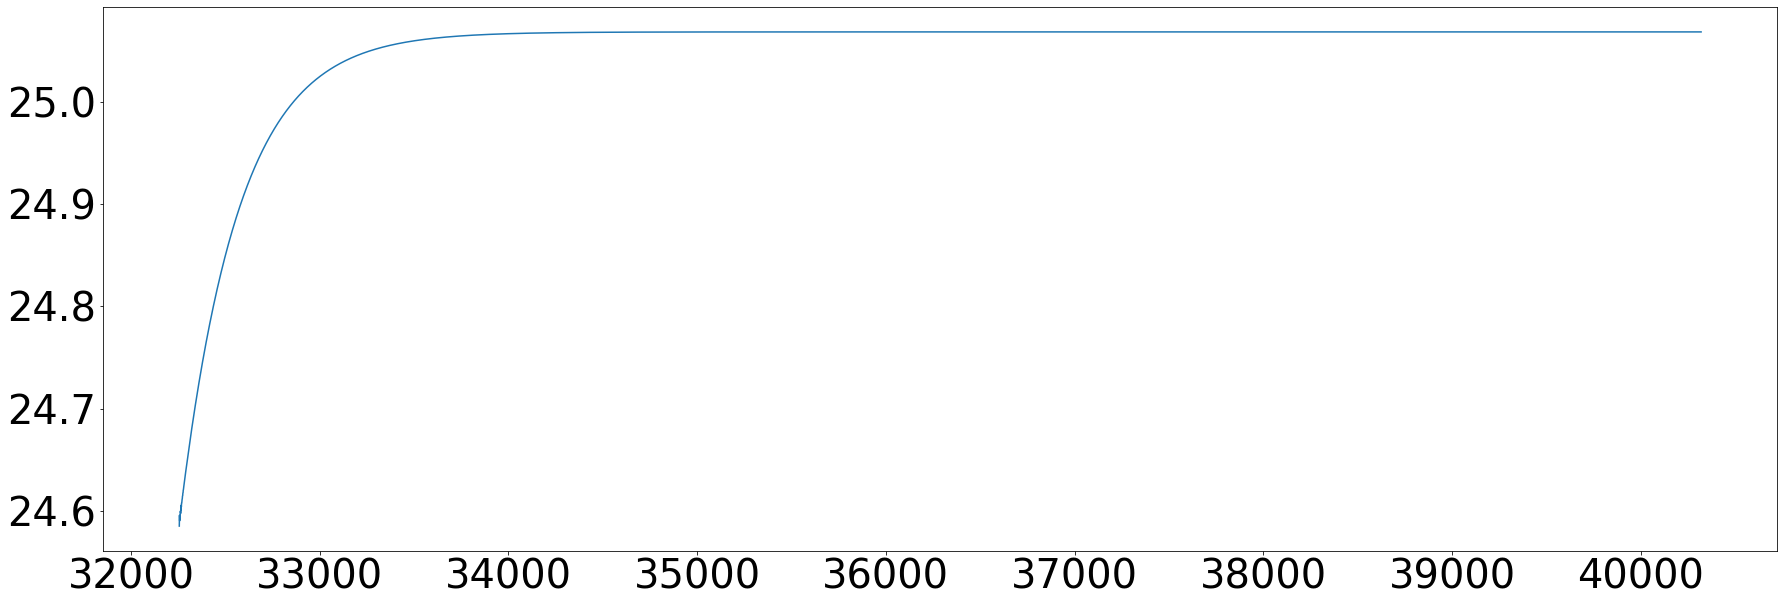

In [ ]:
plt.rcParams.update({'figure.figsize':(30,10)})
# plt.xlim([train_size, train_size + 100])
plt.plot(wbgt_forecast,label='wbgt_forecast')
plt.show()

In [ ]:
np.sqrt(mean_squared_error(test,wbgt_forecast))
# 1,0,1 = 0.8920004415275093
# 1,1,1 = 1.098299686734862
# 4,0,4 = 0.8864833253238622

0.8864833253238622

In [ ]:
forecast_series = pd.Series(wbgt_forecast)

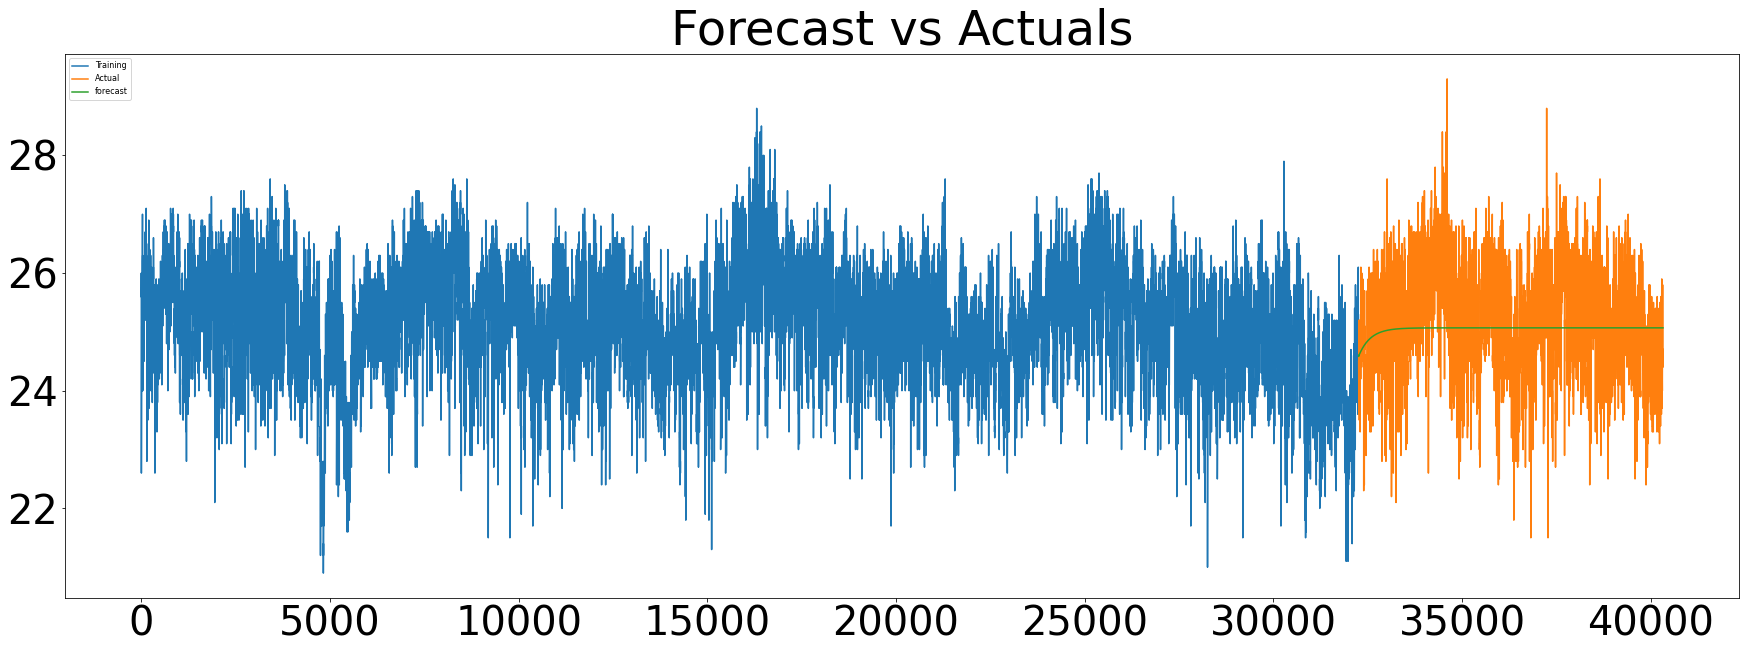

In [ ]:
plt.figure(figsize=(30,10))
plt.plot(train,label='Training')
plt.plot(test, label='Actual')
plt.plot(forecast_series, label='forecast')

plt.title('Forecast vs Actuals')

plt.legend(loc='upper left', fontsize=8)
#plt.xlim([train_size, test_size])
#plt.ylim([23.5, 25.5])
plt.show()

In [ ]:
np.sqrt(mean_squared_error(test,wbgt_forecast))

0.8864833253238622

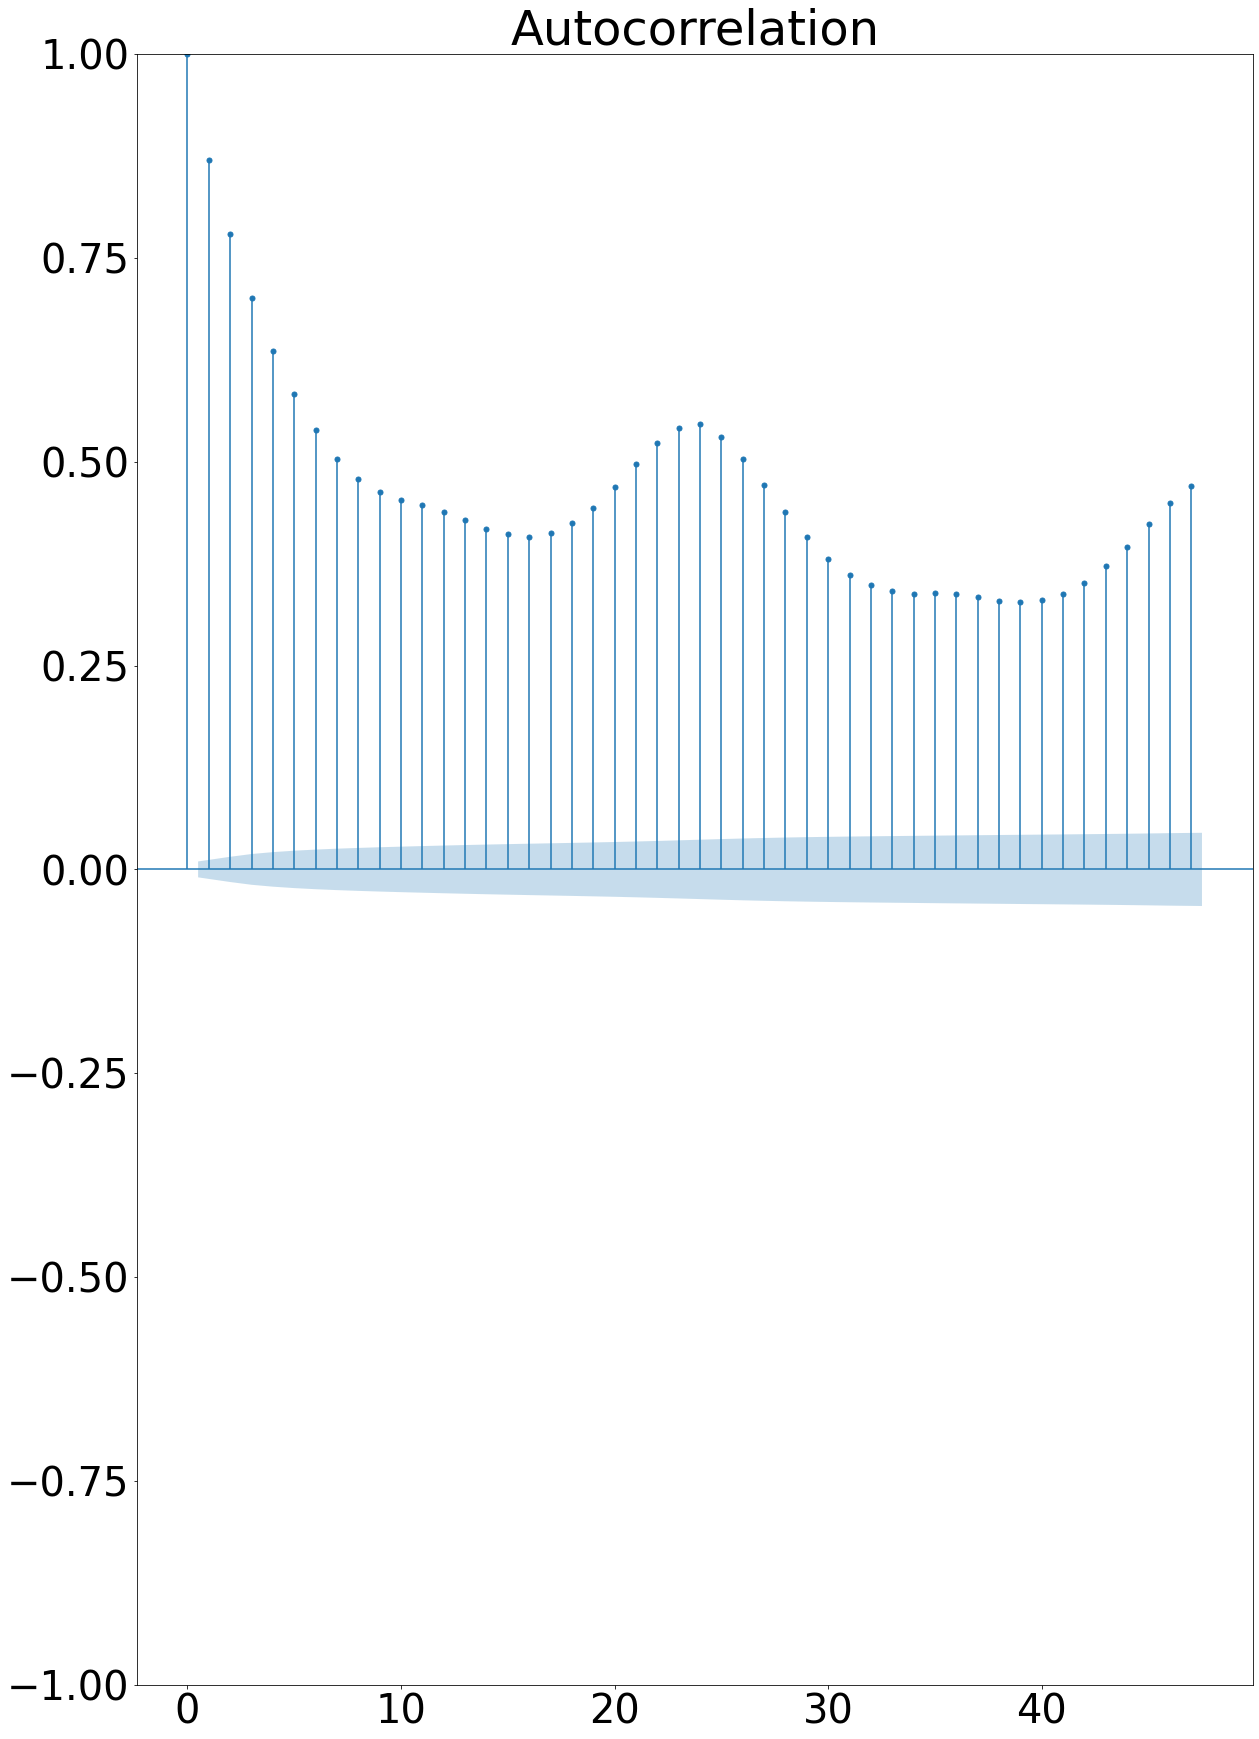

In [ ]:
plt.rcParams.update({'figure.figsize':(20,30)})

# Original Series
# plt.plot(df_timeseries.wet_bulb_temperature)
plot_acf(df_timeseries.wet_bulb_temperature)

# 1st Differencing
# plt.plot(df_timeseries.wet_bulb_temperature.diff())
# plot_acf(df_timeseries.wet_bulb_temperature.diff().dropna())

# 2nd Differencing
# plt.plot(df_timeseries.wet_bulb_temperature.diff().diff())
# plot_acf(df_timeseries.wet_bulb_temperature.diff().diff().dropna())

plt.show()

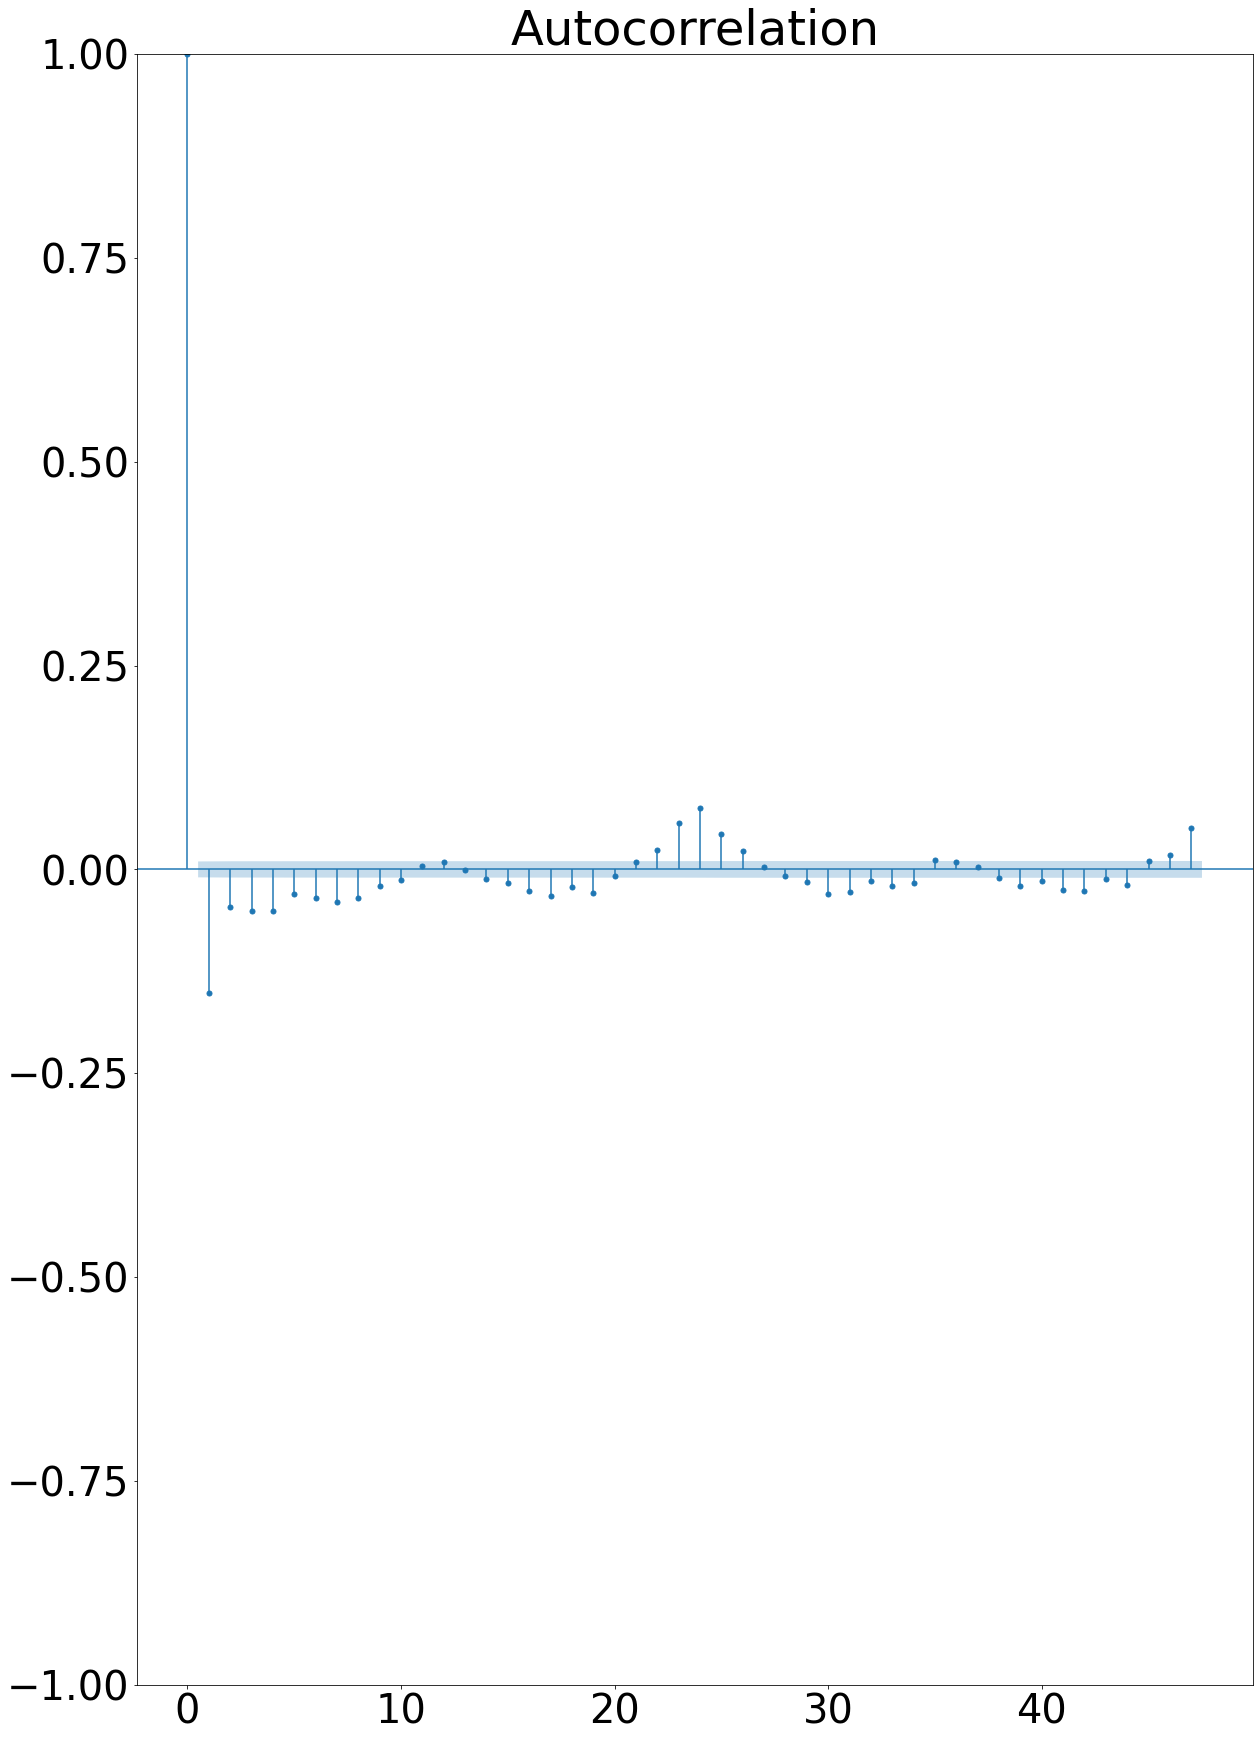

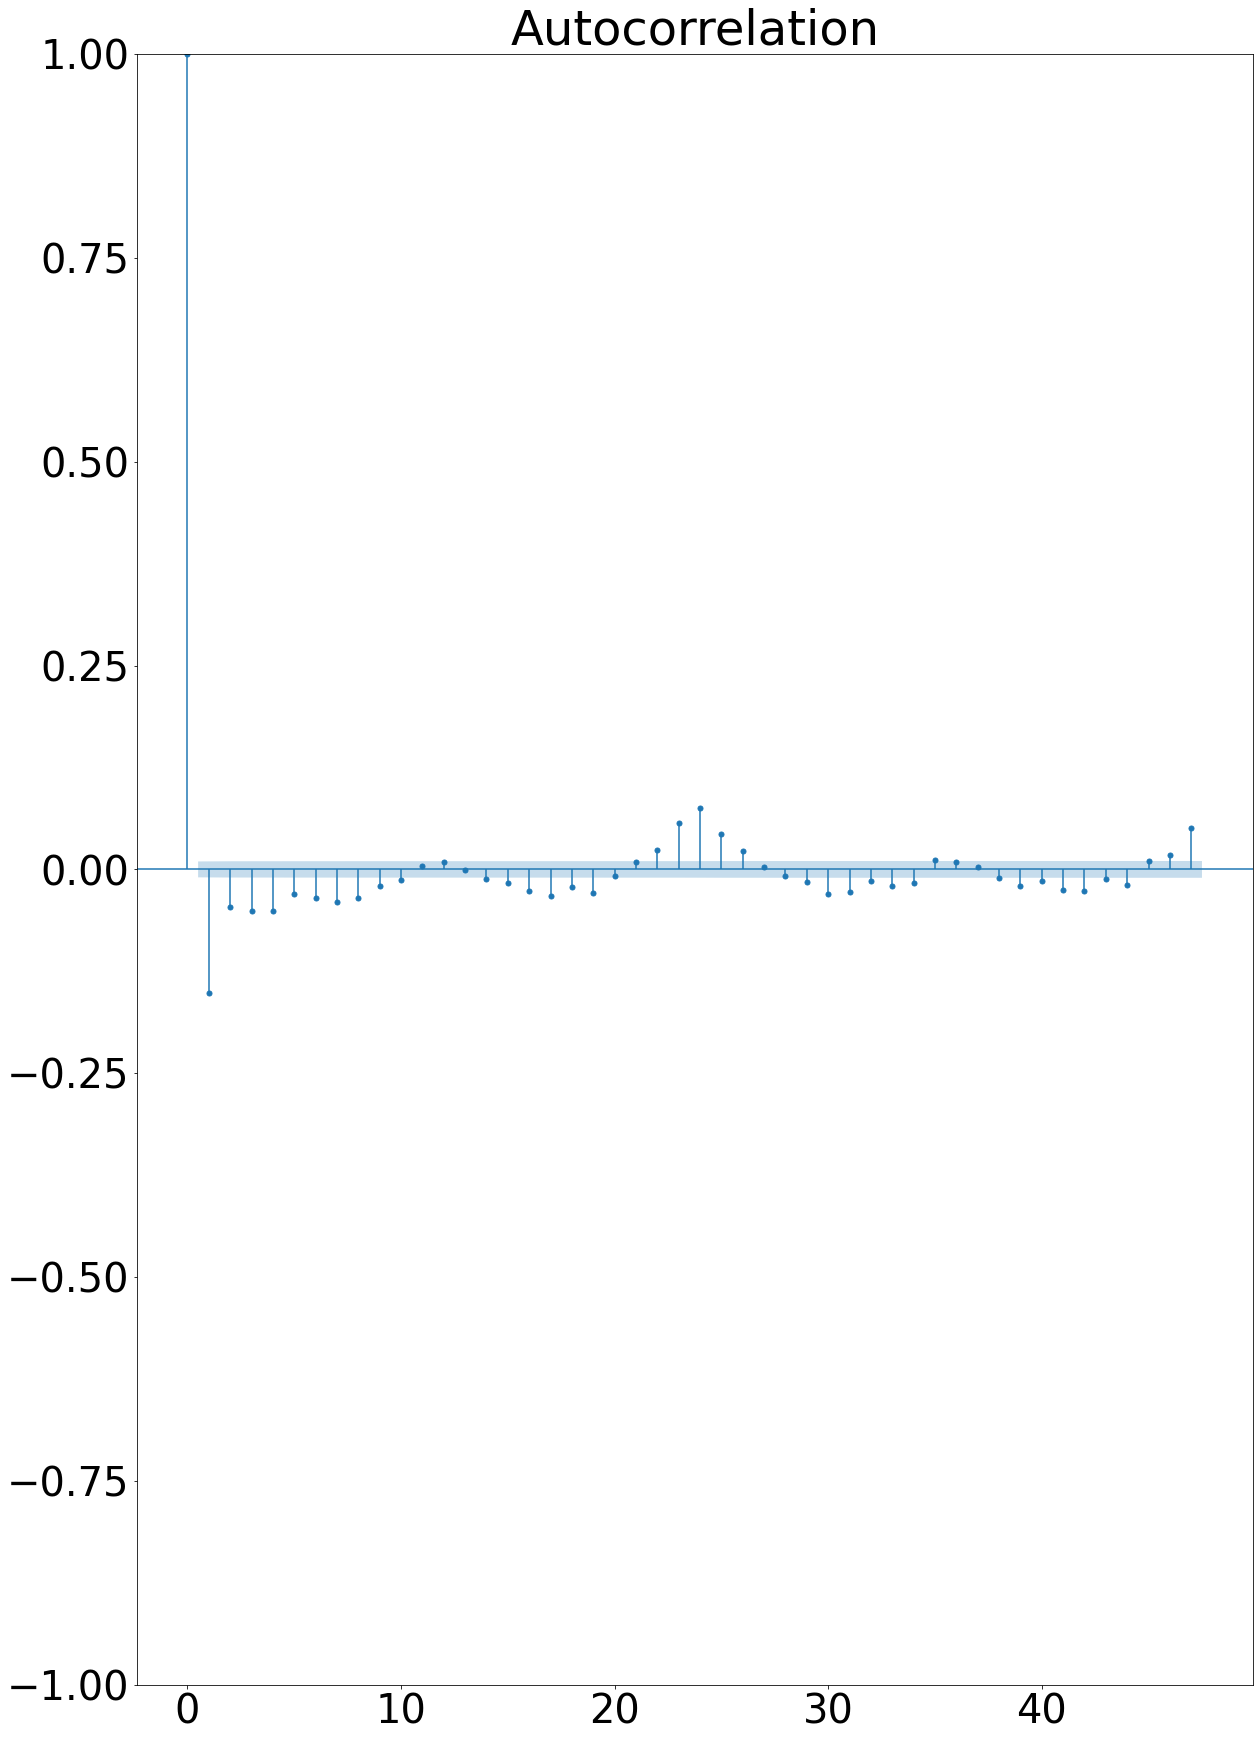

In [ ]:
# 1st Differencing
# plt.plot(df_timeseries.wet_bulb_temperature.diff())
plot_acf(df_timeseries.wet_bulb_temperature.diff().dropna())

# 2nd Differencing
# plt.plot(df_timeseries.wet_bulb_temperature.diff().diff())
# plot_acf(df_timeseries.wet_bulb_temperature.diff().diff().dropna())

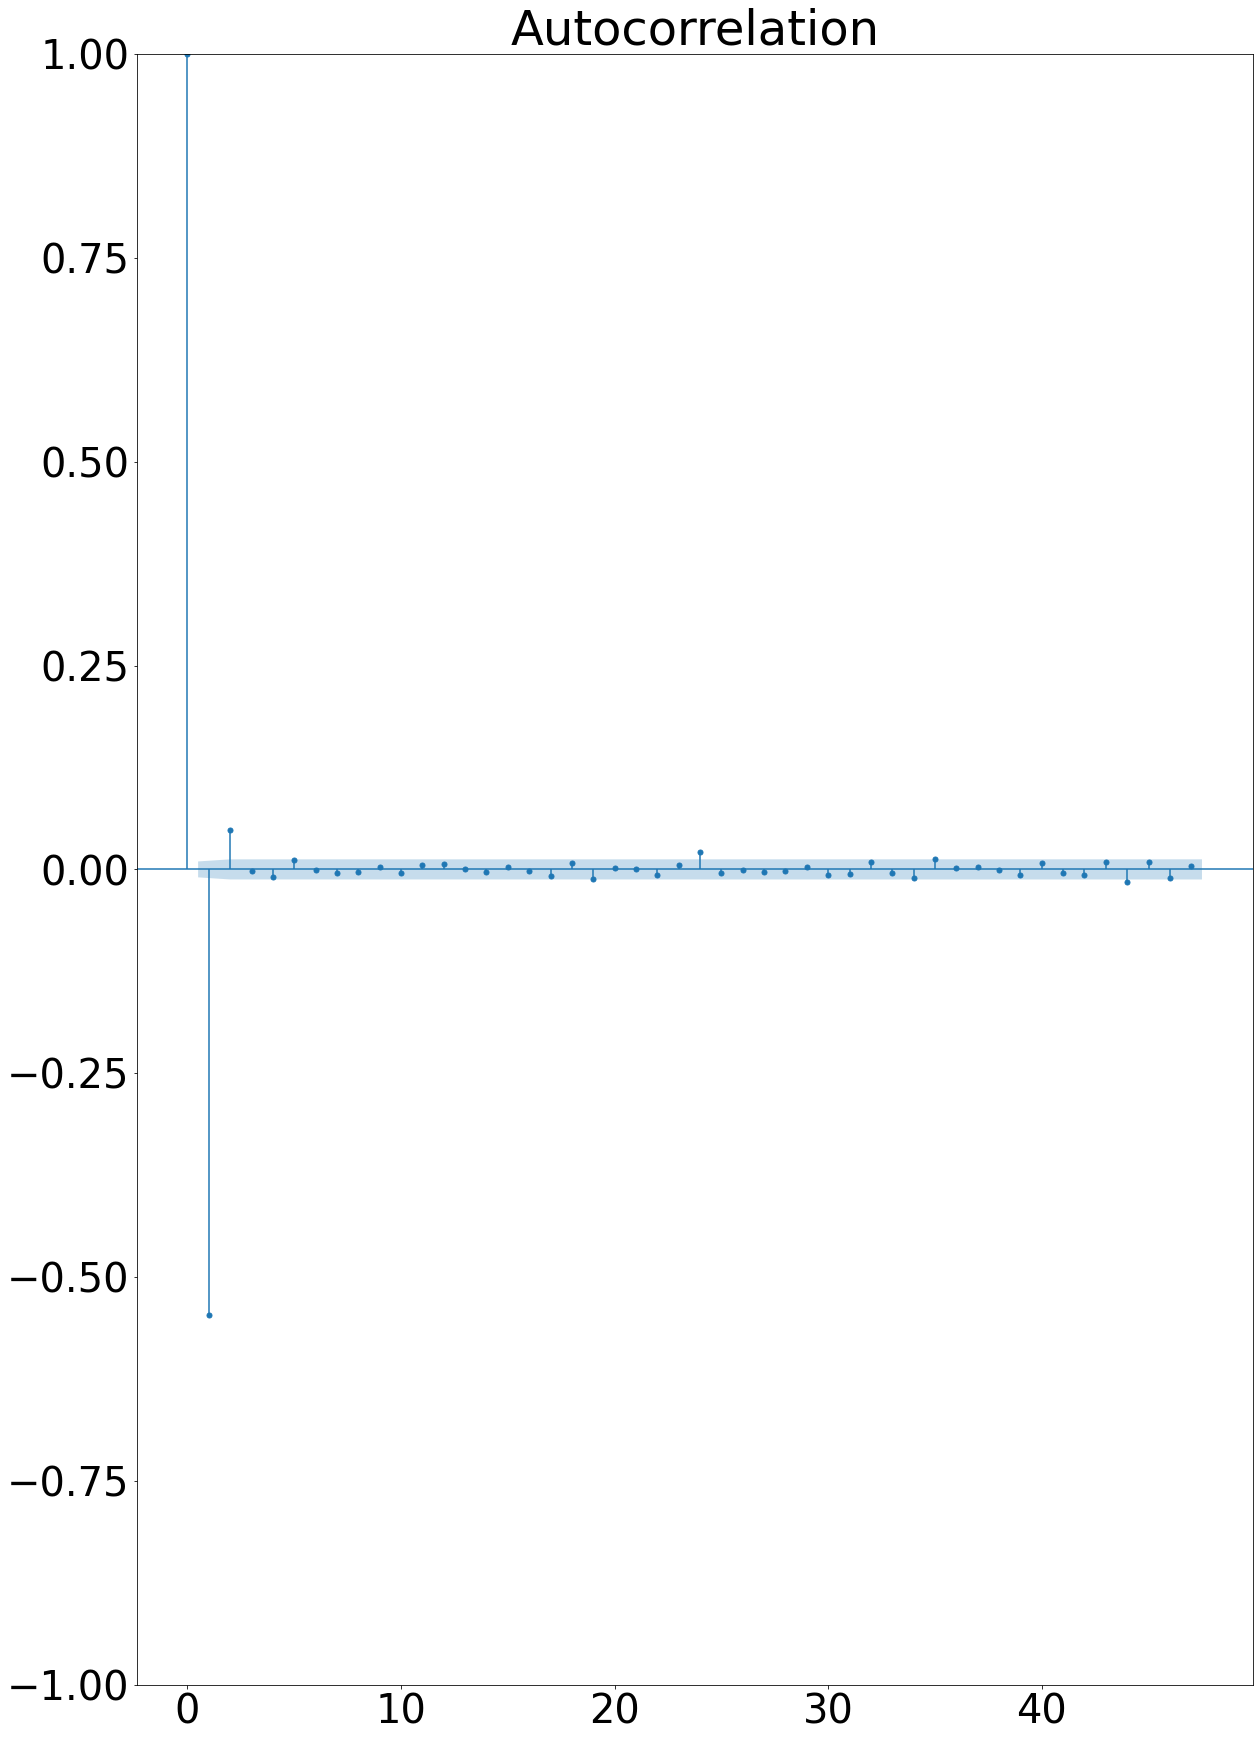

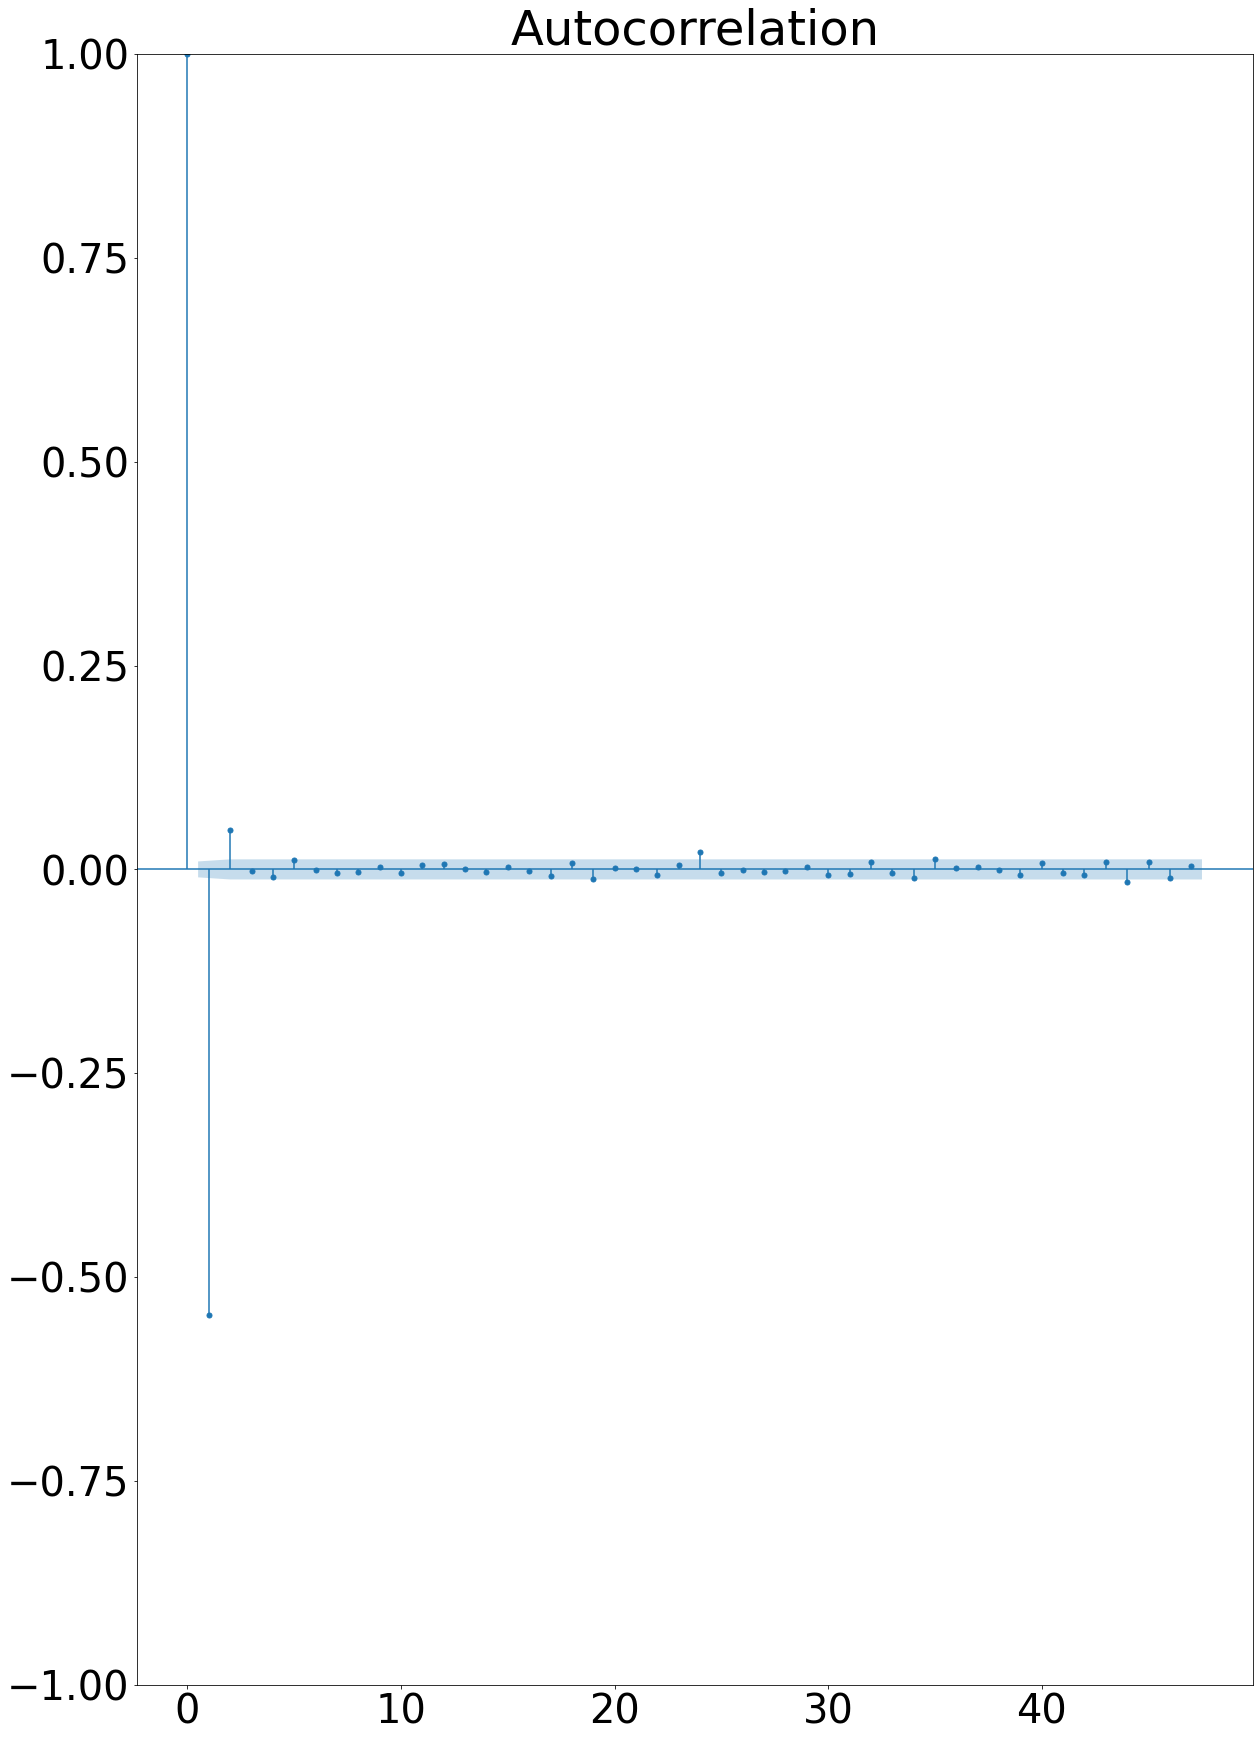

In [ ]:
# 1st Differencing
# plt.plot(df_timeseries.wet_bulb_temperature.diff())
# plot_acf(df_timeseries.wet_bulb_temperature.diff().dropna())

# 2nd Differencing
# plt.plot(df_timeseries.wet_bulb_temperature.diff().diff())
plot_acf(df_timeseries.wet_bulb_temperature.diff().diff().dropna())

In [ ]:
# 4,0,4 ARIMA Model
#model = sm.tsa.arima.ARIMA(df_timeseries.wet_bulb_temperature.diff().diff().dropna(), order=(1,0,1))
model = sm.tsa.arima.ARIMA(df_timeseries.wet_bulb_temperature, order=(4,0,4))
model_fit = model.fit()
print(model_fit.summary())

c:\Users\Bernie\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\Bernie\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\Users\Bernie\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                SARIMAX Results                                 
Dep. Variable:     wet_bulb_temperature   No. Observations:                40320
Model:                   ARIMA(4, 0, 4)   Log Likelihood              -24373.079
Date:                  Tue, 17 May 2022   AIC                          48766.157
Time:                          16:36:32   BIC                          48852.203
Sample:                               0   HQIC                         48793.383
                                - 40320                                         
Covariance Type:                    opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         25.0863      0.087    289.559      0.000      24.916      25.256
ar.L1          0.0417      0.101      0.413      0.679      -0.156       0.240
ar.L2          1.4326      0.098    

c:\Users\Bernie\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\plotting\_matplotlib\tools.py:400: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():
c:\Users\Bernie\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\plotting\_matplotlib\tools.py:400: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():


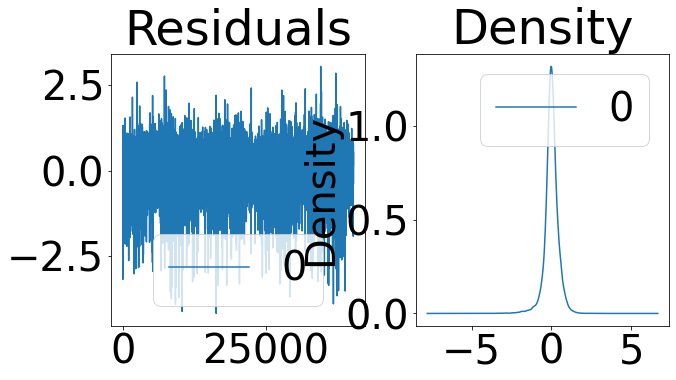

In [ ]:
# Plot residual errors
# residuals = pd.DataFrame(model_fit.resid)
# fig, ax = plt.subplots(1,2)
# residuals.plot(title="Residuals", ax=ax[0])
# residuals.plot(kind='kde', title='Density', ax=ax[1])
# plt.show()

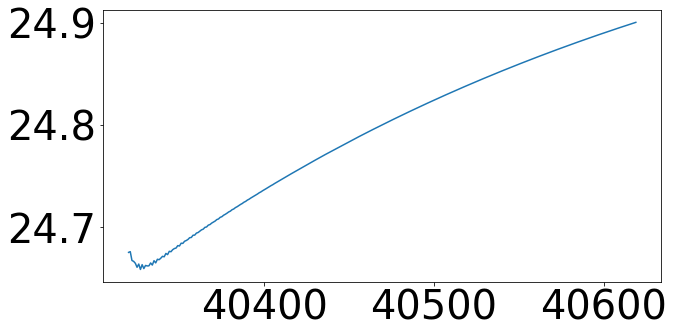

In [ ]:
# Actual vs Fitted
plt.rcParams.update({'figure.figsize':(10,5)})
forecast_part2 = model_fit.forecast(steps=300, alpha=0.05)
forecast = pd.Series(forecast_part2)
plt.plot(forecast)

In [ ]:
forecast

40320    24.675485
40321    24.676197
40322    24.667559
40323    24.666707
40324    24.664830
           ...    
40615    24.898105
40616    24.898647
40617    24.899186
40618    24.899725
40619    24.900261
Name: predicted_mean, Length: 300, dtype: float64